## Дана функция:
__f(x) = -12*x**4*sin(cos(x)) - 18*x**3+5*x**2 + 10*x - 30__
1. Определить корни
2. Найти интервалы, на которых функция возрастает
3. Найти интервалы, на которых функция убывает
4. Построить график
5. Вычислить вершину
6. Определить промежутки, на котором f > 0
7. Определить промежутки, на котором f < 0

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a, b, c, d, e = -12, -18, 5, 10, -30
limit = 9
step = 0.01
line_style = '-'                 
color = 'b'
direct_up = True

In [4]:
# Переключатель стиля линии
def switch_line():
    global line_style
    if line_style == '-':
        line_style = '--'
    else:
        line_style = '-'
    return line_style

In [5]:
# Переключатель цвета линии
def switch_color():
    global color
    if color == 'b':
        color = 'r'
    else:
        color = 'b'
    return color

In [6]:
def func(x):
    f = a * x ** 4 * np.sin(np.cos(x)) + b * x ** 3 + c * x ** 2 + d * x + e
    return f

In [7]:
x = np.arange(-limit, limit + 1, step)
x_change = [(-limit, 'limit')]

In [8]:
for i in range(len(x) - 1):
    if func(x[i]) > 0 and func(x[i + 1]) < 0 or func(x[i]) < 0 and func(x[i + 1]) > 0:
        x_acr = np.arange(x[i], x[i + 1], 0.000001)         # находим интервал х, где функция меняет знак
        for j in range(len(x_acr) - 1):                     # с маленьким шагом для повышения точности
            if func(x_acr[j]) > 0 and func(x_acr[j + 1]) < 0 or func(x_acr[j]) < 0 and func(x_acr[j + 1]) > 0:
                x_change.append((x_acr[j], 'zero'))         # и записываем все эти х как корни
    if direct_up:
        if func(x[i]) > func(x[i + 1]):
            direct_up = False                     # как только кривая меняет направление с + на - или наоборот,
            x_change.append((x[i], 'dir'))        # эти х записываем как экстремумы и меняем флаг
    else:
        if func(x[i]) < func(x[i + 1]):
            direct_up = True
            x_change.append((x[i], 'dir'))

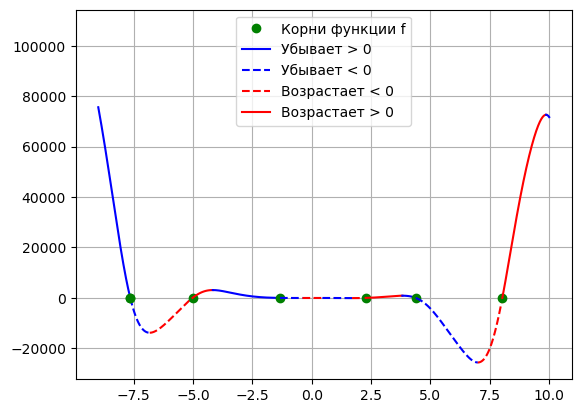

In [9]:
x_change.append((limit + 1, 'limit'))
for i in range(len(x_change) - 1):
    cur_x = np.arange(x_change[i][0], x_change[i + 1][0] + step, step)
    if x_change[i][1] == 'zero':        # при пересечении кривой оси х мы обозначаем эту точку зеленым цветом
        plt.plot(x_change[i][0], func(x_change[i][0]), 'go') 
        plt.rcParams['lines.linestyle'] = switch_line()       # меняем стиль отображения линии
        plt.plot(cur_x, func(cur_x), color)                   
    else:
        plt.plot(cur_x, func(cur_x), switch_color())          # а в ненулевых точках - меняем цвет
        
plt.plot(-7.651, func(-7.651), 'go', label='Корни функции f') 
plt.plot(-9, func(-9), 'b', label='Убывает > 0') 
plt.plot(-7.651, func(-10), 'b--', label='Убывает < 0')
plt.plot(10, func(10), 'r--', label='Возрастает < 0')
plt.plot(10, func(10), 'r', label='Возрастает > 0')
plt.legend()        
plt.grid()         # сетка на графике
plt.show()         # для Python

In [10]:
x_roots = set()
print('Корни уравнения для заданного интервала: ')
for i in range(len(x_change) - 1):
    if x_change[i][1] == 'zero':
        x_roots.add(round(float(x_change[i][0]), 3))
all_roots = list(x_roots)
all_roots.sort()
print(*all_roots)

Корни уравнения для заданного интервала: 
-7.651 -5.027 -1.339 2.273 4.384 8.035


In [11]:
x_extr = set()
print('Экстремумы для заданного интервала: ')
for i in range(len(x_change) - 1):
    if x_change[i][1] == 'dir':
        x_extr.add(round(float(x_change[i][0]), 3))
all_extr = list(x_extr)
all_extr.sort()        
print(*all_extr)

Экстремумы для заданного интервала: 
-9.0 -6.83 -4.17 -0.39 0.45 1.7 3.82 7.0 9.88
